# Import Statements


The following code snippet imports various libraries and modules used for different purposes, such as machine learning, data manipulation, regular expressions, plotting, and more. These imports enable the use of specific functions and classes provided by the respective libraries.

In [11]:
import tensorflow as tf
import os
import json
import pandas as pd
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import collections
import random
import requests
from math import sqrt
from PIL import Image
from tqdm.auto import tqdm

Certainly! Here's the code snippet with a heading and a brief description:

## CNN Encoder

The `CNN_Encoder` function is defined to create a convolutional neural network (CNN) encoder using the InceptionV3 architecture. This encoder is commonly used for image feature extraction in various deep learning tasks.

The code performs the following steps:

1. Instantiates the InceptionV3 model from `tf.keras.applications` with the `include_top` parameter set to `False` to exclude the fully connected layers at the top of the network.
2. Sets the weights of the InceptionV3 model to pre-trained weights on the ImageNet dataset by specifying `weights='imagenet'`.
3. Freezes the weights of the InceptionV3 model by setting `inception_v3.trainable = False`.
4. Retrieves the output tensor of the InceptionV3 model.
5. Applies a reshape operation to rearrange the dimensions of the output tensor to have a shape of `(-1, output.shape[-1])`, where `-1` indicates the batch size is preserved and `output.shape[-1]` represents the number of channels in the output.
6. Constructs a new Keras model `cnn_model` by specifying the input as the input of the InceptionV3 model and the output as the reshaped output tensor.
7. Returns the `cnn_model` as the output of the function.

This `CNN_Encoder` function can be used as a part of an image captioning system or any other application that requires image feature extraction using the InceptionV3 model.


In [40]:
def CNN_Encoder():
    inception_v3 = tf.keras.applications.InceptionV3(
        include_top=False,
        weights='imagenet'
    )
    inception_v3.trainable = False

    output = inception_v3.output
    output = tf.keras.layers.Reshape(
        (-1, output.shape[-1]))(output)

    cnn_model = tf.keras.models.Model(inception_v3.input, output)
    return cnn_model

## Load Image

The `load_image` function is defined to read and preprocess an image from a given image path. The function performs the following operations:

1. Reads the image file using `tf.io.read_file` function.
2. Decodes the image file into a tensor using `tf.io.decode_jpeg`, specifying `channels=3` to ensure it's a 3-channel RGB image.
3. Resizes the image tensor to a shape of `(299, 299)` using `tf.keras.layers.Resizing`.
4. Normalizes the pixel values of the image tensor by dividing it by 255.
5. Returns the preprocessed image tensor.

## Get Feature Vector

The `get_feature_vector` function is defined to obtain the feature vector representation of an image using the `inception_v3` model. The function performs the following operations:

1. Calls the `load_image` function to preprocess the image from the given image path.
2. Expands the dimensions of the preprocessed image tensor along the first axis using `tf.expand_dims`, creating a batch dimension.
3. Passes the preprocessed image tensor through the `inception_v3` model to obtain the feature vector representation.
4. Returns both the preprocessed image tensor and the feature vector.

These functions can be used as part of an image processing pipeline, such as in image classification or feature extraction tasks.


In [13]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299,299)(img)
    img = img/255
    return img

def get_feature_vector(img_path):
    img = load_image(img_path)
    img = tf.expand_dims(img,axis=0)
    feature_vector = inception_v3(img)
    return img, feature_vector

Certainly! Here's the code snippet with a heading and a brief description:

## Image Feature Extraction and Display

The code snippet performs the following tasks:

1. **Image Feature Extraction:**
   - Calls the `get_feature_vector` function to obtain the feature vector representation of an image. The image file `"download.jpg"` is passed as an argument, and the function returns the preprocessed image tensor (`img`) and the feature vector (`feature_vector`).
   
2. **Image Display:**
   - Uses `plt.imshow` to display the image represented by the preprocessed image tensor (`img`). The `np.squeeze` function is used to remove the batch dimension from the image tensor.
   - `plt.axis('off')` is used to remove the axis labels and ticks from the image plot.
   - `plt.show()` is called to display the image.
   
3. **Print Image and Feature Vector Sizes:**
   - Prints the shape of the input image tensor (`img.shape`) to display its size.
   - Prints the shape of the feature vector tensor (`feature_vector.shape`) to display its size.
   
This code snippet demonstrates the process of extracting image features using the `get_feature_vector` function, displaying the image using `plt.imshow`, and printing the sizes of the input image and feature vector.

Let me know if there's anything else I can assist you with!

In [14]:
img, feature_vector = get_feature_vector("download.jpg")

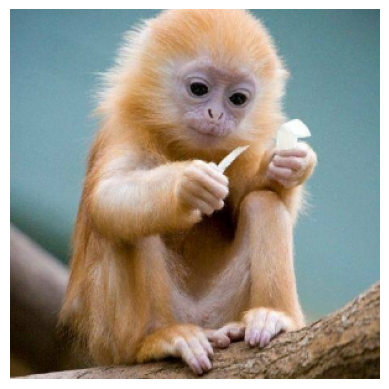

input image size:  (1, 299, 299, 3)
Feature vextor size:  (1, 8, 8, 2048)


In [15]:
plt.imshow(np.squeeze(img,axis=0))
plt.axis('off')
plt.show()

print('input image size: ',img.shape)
print('Feature vextor size: ', feature_vector.shape)



## Text Preprocessing and DataFrame Manipulation

The code snippet performs text preprocessing and DataFrame manipulation tasks. It consists of two functions and DataFrame operations. 

### Preprocess Text

The `preprocess` function is defined to preprocess a given text. The preprocessing steps applied to the text are as follows:
- Convert the text to lowercase using `text.lower()`.
- Remove any non-alphanumeric characters and punctuation using `re.sub(r'[^\w\s]', '', text)`.
- Reduce multiple consecutive whitespace characters to a single space using `re.sub('\s+', ' ', text)`.
- Remove leading and trailing whitespace using `text.strip()`.
- Add special start and end tokens, `'[start]'` and `'[end]'`, respectively, to the text using concatenation.
The preprocessed text is then returned.

### DataFrame Manipulation

The code loads a DataFrame from a CSV file named `'captions.txt'` using `pd.read_csv('captions.txt')`. The DataFrame is assigned to the variable `captions`.

The DataFrame manipulation is performed on the `'image'` column of the DataFrame. The `'image'` column values are modified by prepending the string `'Images/'` to each value using a lambda function and the `apply` method. This modification is done to specify the image file path or location.

Finally, the `head()` method is called on the DataFrame to display the first few rows of the modified DataFrame.

This code snippet demonstrates the text preprocessing steps applied in the `preprocess` function and DataFrame manipulation operations performed on the `'image'` column of the `captions` DataFrame.



In [16]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = '[start] ' + text + ' [end]'
    return text

In [23]:
captions = pd.read_csv('captions.txt')
captions['image'] = captions['image'].apply(
    lambda x: f'Images/{x}')
captions.head()

,image,caption
0,Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...



## Caption Preprocessing and Image Display

The code snippet involves caption preprocessing using the `preprocess` function and displaying a randomly selected image.

### Caption Preprocessing

The code modifies the `'caption'` column of the `captions` DataFrame using the `apply` method and the `preprocess` function. The `preprocess` function is applied to each element in the `'caption'` column, resulting in the captions being preprocessed.

### Displaying Random Image

The code selects a random row from the `captions` DataFrame using the `sample` method with `n=1` (to select a single random row) and then retrieves the first row using `iloc[0]`.

- The preprocessed caption from the selected row is printed using `print(random_row.caption)`.
- An image is opened using the `Image.open` function from the PIL (Python Imaging Library) module. The image path is obtained from the `'image'` column of the selected row.
- The image is displayed.

This code snippet demonstrates how to preprocess captions in the `'caption'` column of the `captions` DataFrame and how to display a random image using the PIL module.



In [24]:
captions['caption'] = captions['caption'].apply(preprocess)
captions.head()

,image,caption
0,Images/1000268201_693b08cb0e.jpg,[start] a child in a pink dress is climbing up...
1,Images/1000268201_693b08cb0e.jpg,[start] a girl going into a wooden building [end]
2,Images/1000268201_693b08cb0e.jpg,[start] a little girl climbing into a wooden p...
3,Images/1000268201_693b08cb0e.jpg,[start] a little girl climbing the stairs to h...
4,Images/1000268201_693b08cb0e.jpg,[start] a little girl in a pink dress going in...


[start] a baseball pitcher is bowling the ball [end]



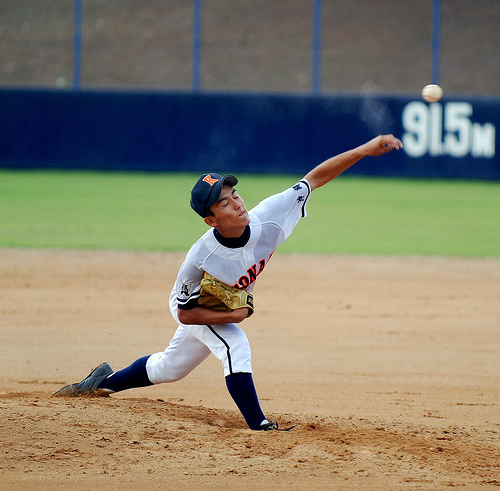

In [25]:
random_row = captions.sample(1).iloc[0]
print(random_row.caption)
print()
im = Image.open(random_row.image)
im



## Model Configuration Parameters

The code snippet defines several configuration parameters for a model. These parameters are used to specify the settings and dimensions for the model architecture, training, and data processing.

- `MAX_LENGTH`: The maximum length of the input sequence or caption. This parameter determines the maximum number of tokens or words that can be present in a caption.
- `VOCABULARY_SIZE`: The size of the vocabulary or the number of unique words in the dataset. This parameter defines the dimensionality of the word embeddings and the output space of the model's language generation layer.
- `BATCH_SIZE`: The batch size used for training or inference. It determines the number of input examples processed in each training or inference iteration.
- `BUFFER_SIZE`: The buffer size used for shuffling the training data. It represents the number of elements from the dataset that are randomly sampled and buffered for efficient training.
- `EMBEDDING_DIM`: The dimensionality of the word embeddings. This parameter determines the length of the dense vector representations for each word in the vocabulary.
- `UNITS`: The number of units or hidden neurons in the model's recurrent units, such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit). This parameter defines the complexity and capacity of the model's language generation layer.

These configuration parameters play a crucial role in defining the model architecture, training process, and data handling for natural language processing tasks such as caption generation or language translation.


In [26]:
MAX_LENGTH = 40
VOCABULARY_SIZE = 10000
BATCH_SIZE = 32
BUFFER_SIZE = 1000
EMBEDDING_DIM = 512
UNITS = 512


## Data Preprocessing and Train-Validation Split

The code snippet involves data preprocessing and the splitting of data into training and validation sets.

### Text Tokenization

- `tokenizer`: The `TextVectorization` layer is instantiated to tokenize the captions. It takes the following parameters:
  - `max_tokens`: The maximum number of tokens (words) in the vocabulary.
  - `standardize`: A function or `None` that can be used to preprocess the text before tokenization (in this case, no standardization is applied).
  - `output_sequence_length`: The maximum length of the tokenized sequences (captions).

- `tokenizer.adapt`: The tokenizer is adapted to the captions data by calling the `adapt` method and passing the `'caption'` column of the `captions` DataFrame as input.

### Word-to-Index and Index-to-Word Mapping

- `word2idx`: The `StringLookup` layer is instantiated to map words to indices. It takes the following parameters:
  - `mask_token`: A special token used for masking.
  - `vocabulary`: The vocabulary obtained from the tokenizer's `get_vocabulary` method.

- `idx2word`: The `StringLookup` layer is instantiated to map indices back to words. It takes the following parameters:
  - `mask_token`: A special token used for masking.
  - `vocabulary`: The vocabulary obtained from the tokenizer's `get_vocabulary` method.
  - `invert=True`: Specifies that the mapping should be from indices to words.

### Data Splitting

- `img_to_cap_vector`: A `defaultdict` is initialized to store image-to-caption mappings, where each image key is associated with a list of captions.
- `for` loop: Iterates over the `'image'` and `'caption'` columns of the `captions` DataFrame and populates `img_to_cap_vector` with the image-to-caption mappings.

- `img_keys`: A list of image keys is obtained from `img_to_cap_vector` and then shuffled randomly using `random.shuffle`.
- `slice_index`: The index used to split the image keys into training and validation sets is calculated as 80% of the total number of image keys.

- `train_imgs` and `train_captions`: Lists are initialized to store the training image paths and corresponding captions.
  - Another `for` loop is used to iterate over the image keys in the training set (`img_name_train_keys`), and for each image key, the associated captions are added to the lists.

- `val_imgs` and `val_captions`: Lists are initialized to store the validation image paths and corresponding captions.
  - Another `for` loop is used to iterate over the image keys in the validation set (`img_name_val_keys`), and for each image key, the associated captions are added to the lists.

This code snippet demonstrates the tokenization of captions using the `TextVectorization` layer, mapping words to indices and indices to words using `StringLookup` layers, and splitting the data into training and validation sets based on the image keys and their associated captions.


In [65]:
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCABULARY_SIZE,
    standardize=None,
    output_sequence_length=MAX_LENGTH)

tokenizer.adapt(captions['caption'])

In [28]:
word2idx = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())

idx2word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [29]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(captions['image'], captions['caption']):
    img_to_cap_vector[img].append(cap)

img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = (img_keys[:slice_index], 
                                          img_keys[slice_index:])

train_imgs = []
train_captions = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    train_imgs.extend([imgt] * capt_len)
    train_captions.extend(img_to_cap_vector[imgt])

val_imgs = []
val_captions = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    val_imgs.extend([imgv] * capv_len)
    val_captions.extend(img_to_cap_vector[imgv])

In [30]:
len(train_imgs), len(train_captions), len(val_imgs), len(val_captions)

(32360, 32360, 8095, 8095)



## Data Loading and Augmentation

The code snippet involves loading the data and performing data augmentation for the training dataset.

### Data Loading and Preprocessing

- `load_data` function: This function takes an image path and caption as input and performs the following steps:
  - Reads the image file using `tf.io.read_file`.
  - Decodes the JPEG image into a tensor with 3 channels using `tf.io.decode_jpeg`.
  - Resizes the image to a target size of 299x299 pixels using `tf.keras.layers.Resizing`.
  - Normalizes the pixel values to the range [0, 1] by dividing by 255.
  - Tokenizes the caption using the previously defined `tokenizer` layer.

- `train_dataset`: A TensorFlow dataset is created from tensor slices of the training image paths and captions using `tf.data.Dataset.from_tensor_slices`. Each element of the dataset consists of an image path and its corresponding caption.
  - The `load_data` function is applied to each element of the dataset using the `map` method. This function loads and preprocesses the image and tokenizes the caption.
  - The dataset is shuffled with a buffer size of `BUFFER_SIZE`.
  - The dataset is batched with a batch size of `BATCH_SIZE`.

- `val_dataset`: A TensorFlow dataset is created from tensor slices of the validation image paths and captions, similar to the `train_dataset`.
  - The `load_data` function is applied to each element of the dataset, performing the same data loading and preprocessing steps.
  - The dataset is shuffled and batched in the same manner as the training dataset.

### Image Augmentation

- `image_augmentation`: A `Sequential` model is created to apply image augmentation techniques.
  - The model consists of three augmentation layers:
    - `RandomFlip`: Randomly flips the image horizontally.
    - `RandomRotation`: Randomly rotates the image by a factor of 0.2 radians.
    - `RandomContrast`: Randomly adjusts the contrast of the image by a factor of 0.3.

This code snippet demonstrates the loading and preprocessing of data, including image loading, resizing, normalization, and caption tokenization. It also showcases the creation of training and validation datasets using TensorFlow datasets. Additionally, it introduces an image augmentation pipeline using a `Sequential` model with various augmentation layers.


In [31]:
def load_data(img_path, caption):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = img / 255.
    caption = tokenizer(caption)
    return img, caption

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_imgs, train_captions))

train_dataset = train_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE
    ).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_imgs, val_captions))

val_dataset = val_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE
    ).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [33]:
image_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomContrast(0.3),
    ]
)


### CNN Encoder

The `CNN_Encoder` function defines a Convolutional Neural Network (CNN) encoder using the InceptionV3 architecture. Here are the key steps performed by this function:
- An InceptionV3 model is instantiated with the `include_top=False` parameter, indicating that the final fully connected layer (top) will not be included.
- The pre-trained weights from the ImageNet dataset are loaded into the InceptionV3 model.
- The `trainable` attribute of the InceptionV3 model is set to `False`, freezing the weights during training.
- The output tensor of the InceptionV3 model is reshaped using `tf.keras.layers.Reshape` to have a shape of `(-1, output.shape[-1])`.
- A new model, `cnn_model`, is created using the input tensor of the InceptionV3 model and the reshaped output tensor as the output. This model represents the CNN encoder.
- The `cnn_model` is returned by the function.

### Transformer Encoder Layer

The `TransformerEncoderLayer` class defines a single layer of the Transformer encoder. Here's an overview of this class:
- The class extends `tf.keras.layers.Layer` and contains various components of a Transformer encoder layer.
- The layer normalization is applied twice using `tf.keras.layers.LayerNormalization`.
- The multi-head attention mechanism is implemented using `tf.keras.layers.MultiHeadAttention`.
- A dense layer with a ReLU activation function is used for feed-forward processing.

### Embeddings

The `Embeddings` class defines the embedding layer used in the Transformer model. Here's a summary of this class:
- The class extends `tf.keras.layers.Layer` and contains the token and position embeddings.
- The token embeddings are implemented using `tf.keras.layers.Embedding`, which maps the input token IDs to their corresponding embedding vectors.
- The position embeddings are also implemented using `tf.keras.layers.Embedding`, mapping the position indices to their corresponding embedding vectors.
- The `call` method takes input token IDs and generates token embeddings and position embeddings.

These code snippets demonstrate the implementation of a CNN encoder using InceptionV3, a Transformer encoder layer, and embedding layers in a Transformer model.



In [ ]:
def CNN_Encoder():
    inception_v3 = tf.keras.applications.InceptionV3(
        include_top=False,
        weights='imagenet'
    )
    inception_v3.trainable = False

    output = inception_v3.output
    output = tf.keras.layers.Reshape(
        (-1, output.shape[-1]))(output)

    cnn_model = tf.keras.models.Model(inception_v3.input, output)
    return cnn_model

In [34]:
class TransformerEncoderLayer(tf.keras.layers.Layer):

    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense = tf.keras.layers.Dense(embed_dim, activation="relu")
    

    def call(self, x, training):
        x = self.layer_norm_1(x)
        x = self.dense(x)

        attn_output = self.attention(
            query=x,
            value=x,
            key=x,
            attention_mask=None,
            training=training
        )

        x = self.layer_norm_2(x + attn_output)
        return x

In [35]:
class Embeddings(tf.keras.layers.Layer):

    def __init__(self, vocab_size, embed_dim, max_len):
        super().__init__()
        self.token_embeddings = tf.keras.layers.Embedding(
            vocab_size, embed_dim)
        self.position_embeddings = tf.keras.layers.Embedding(
            max_len, embed_dim, input_shape=(None, max_len))
    

    def call(self, input_ids):
        length = tf.shape(input_ids)[-1]
        position_ids = tf.range(start=0, limit=length, delta=1)
        position_ids = tf.expand_dims(position_ids, axis=0)

        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)

        return token_embeddings + position_embeddings

In [36]:
Embeddings(tokenizer.vocabulary_size(), EMBEDDING_DIM, MAX_LENGTH)(next(iter(train_dataset))[1]).shape

TensorShape([32, 40, 512])


### Transformer Decoder Layer

The `TransformerDecoderLayer` class defines a single layer of the Transformer decoder. Here's an overview of this class:
- The class extends `tf.keras.layers.Layer` and contains various components of a Transformer decoder layer.
- The `embedding` attribute is an instance of the `Embeddings` class, which provides token and position embeddings.
- Two instances of `tf.keras.layers.MultiHeadAttention` are used for self-attention and encoder-decoder attention.
- Three instances of `tf.keras.layers.LayerNormalization` are applied after different stages of the layer.
- Two fully connected layers (`ffn_layer_1` and `ffn_layer_2`) with ReLU activation are used for feed-forward processing.
- The output layer (`out`) is a dense layer with a softmax activation function, producing the predicted token probabilities.
- Two dropout layers (`dropout_1` and `dropout_2`) are used for regularization.

### `call` Method in Transformer Decoder Layer

The `call` method in the `TransformerDecoderLayer` class implements the forward pass of a decoder layer. Here are the key steps performed by this method:
- The input token IDs are passed through the embedding layer to obtain the embeddings.
- Masks are created for the attention mechanisms based on the input and combined using `combined_mask`.
- Self-attention is applied using `attention_1`, and the output is added to the embeddings followed by layer normalization.
- Encoder-decoder attention is applied using `attention_2`, and the output is added to the previous output followed by layer normalization.
- Feed-forward processing is performed using the two fully connected layers (`ffn_layer_1` and `ffn_layer_2`).
- The output is added to the previous output followed by layer normalization.
- Dropout is applied to the output of the second dropout layer.
- The final predicted token probabilities are obtained using the output layer (`out`).

### `get_causal_attention_mask` Method in Transformer Decoder Layer

The `get_causal_attention_mask` method in the `TransformerDecoderLayer` class generates a causal attention mask. Here's an overview of this method:
- The method takes the input embeddings and computes the input shape.
- A lower triangular mask is created with ones above and on the diagonal and zeros below the diagonal.
- The mask is tiled to match the batch size and sequence length of the inputs.

These code snippets demonstrate the implementation of a Transformer decoder layer with self-attention and encoder-decoder attention.


In [37]:
class TransformerDecoderLayer(tf.keras.layers.Layer):

    def __init__(self, embed_dim, units, num_heads):
        super().__init__()
        self.embedding = Embeddings(
            tokenizer.vocabulary_size(), embed_dim, MAX_LENGTH)

        self.attention_1 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.attention_2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )

        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.LayerNormalization()

        self.ffn_layer_1 = tf.keras.layers.Dense(units, activation="relu")
        self.ffn_layer_2 = tf.keras.layers.Dense(embed_dim)

        self.out = tf.keras.layers.Dense(tokenizer.vocabulary_size(), activation="softmax")

        self.dropout_1 = tf.keras.layers.Dropout(0.3)
        self.dropout_2 = tf.keras.layers.Dropout(0.5)
    

    def call(self, input_ids, encoder_output, training, mask=None):
        embeddings = self.embedding(input_ids)

        combined_mask = None
        padding_mask = None
        
        if mask is not None:
            causal_mask = self.get_causal_attention_mask(embeddings)
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attn_output_1 = self.attention_1(
            query=embeddings,
            value=embeddings,
            key=embeddings,
            attention_mask=combined_mask,
            training=training
        )

        out_1 = self.layernorm_1(embeddings + attn_output_1)

        attn_output_2 = self.attention_2(
            query=out_1,
            value=encoder_output,
            key=encoder_output,
            attention_mask=padding_mask,
            training=training
        )

        out_2 = self.layernorm_2(out_1 + attn_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds


    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0
        )
        return tf.tile(mask, mult)


### ImageCaptioningModel

The `ImageCaptioningModel` class defines an image captioning model that combines a CNN model, encoder, and decoder. Here's an overview of this class:
- The class extends `tf.keras.Model` and contains the necessary components for training and evaluating the image captioning model.
- The constructor initializes the CNN model (`cnn_model`), encoder, decoder, and an optional image augmentation layer (`image_aug`).
- Two metrics, `loss_tracker` and `acc_tracker`, are defined to track the loss and accuracy during training and evaluation.

### `calculate_loss` Method

The `calculate_loss` method calculates the loss by considering the true captions (`y_true`), predicted captions (`y_pred`), and a mask that indicates the positions with valid tokens. Here's an overview of this method:
- The loss is computed using the model's loss function (`self.loss`) and multiplied by the mask to exclude the padding tokens.
- The masked loss values are summed and divided by the sum of the mask values to obtain the average loss.

### `calculate_accuracy` Method

The `calculate_accuracy` method calculates the accuracy by comparing the true captions (`y_true`) with the predicted captions (`y_pred`) while considering the mask. Here's an overview of this method:
- The accuracy is computed by checking equality between the true captions and the predicted captions with maximum probability.
- The accuracy values are masked using the provided mask, and then the masked accuracy values are summed and divided by the sum of the mask values to obtain the average accuracy.

### `compute_loss_and_acc` Method

The `compute_loss_and_acc` method computes the loss and accuracy for a given image embedding (`img_embed`) and captions. Here's an overview of this method:
- The encoder is applied to the image embedding to obtain the encoder output.
- The input captions are truncated (`y_input`) and shifted (`y_true`) to match the decoder input and output sequences.
- A mask is created to indicate the valid positions in the captions (excluding padding tokens).
- The decoder is applied to the input captions and encoder output to obtain the predicted captions.
- The loss and accuracy are calculated using the predicted and true captions, along with the mask.

### `train_step` Method

The `train_step` method performs a single training step using a batch of image-caption pairs. Here's an overview of this method:
- The CNN model is applied to the images, and if image augmentation is enabled, the images are augmented.
- The loss and accuracy are computed using the image embeddings and captions.
- The gradients of the trainable variables are calculated using the loss and the `tf.GradientTape`.
- The optimizer is applied to update the trainable variables.
- The loss and accuracy are updated in the `loss_tracker` and `acc_tracker`, respectively.
- The method returns a dictionary containing the updated loss and accuracy.

### `test_step` Method

The `test_step` method performs a single evaluation step using a batch of image-caption pairs. Here's an overview of this method:
- The CNN model is applied to the images to obtain the image embeddings.
- The loss and accuracy are computed using the image embeddings and captions, with training set to `False`.
- The loss and accuracy are updated in the `loss_tracker` and `acc_tracker`, respectively.
- The method returns a dictionary containing the updated loss and accuracy.

### `metrics` Property

The `metrics` property returns a list containing the `loss_tracker` and `acc_tracker` metrics.

These code snippets define an `ImageCaptioningModel` class for training and evaluating an image captioning model.



In [38]:
class ImageCaptioningModel(tf.keras.Model):

    def __init__(self, cnn_model, encoder, decoder, image_aug=None):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.image_aug = image_aug
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.acc_tracker = tf.keras.metrics.Mean(name="accuracy")


    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)


    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)
    

    def compute_loss_and_acc(self, img_embed, captions, training=True):
        encoder_output = self.encoder(img_embed, training=True)
        y_input = captions[:, :-1]
        y_true = captions[:, 1:]
        mask = (y_true != 0)
        y_pred = self.decoder(
            y_input, encoder_output, training=True, mask=mask
        )
        loss = self.calculate_loss(y_true, y_pred, mask)
        acc = self.calculate_accuracy(y_true, y_pred, mask)
        return loss, acc

    
    def train_step(self, batch):
        imgs, captions = batch

        if self.image_aug:
            imgs = self.image_aug(imgs)
        
        img_embed = self.cnn_model(imgs)

        with tf.GradientTape() as tape:
            loss, acc = self.compute_loss_and_acc(
                img_embed, captions
            )
    
        train_vars = (
            self.encoder.trainable_variables + self.decoder.trainable_variables
        )
        grads = tape.gradient(loss, train_vars)
        self.optimizer.apply_gradients(zip(grads, train_vars))
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}
    

    def test_step(self, batch):
        imgs, captions = batch

        img_embed = self.cnn_model(imgs)

        loss, acc = self.compute_loss_and_acc(
            img_embed, captions, training=False
        )

        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}

    @property
    def metrics(self):
        return [self.loss_tracker, self.acc_tracker]


### Creating Model Components

- **Encoder**: The `encoder` is created using the `TransformerEncoderLayer` with the specified embedding dimension and the number of attention heads.
- **Decoder**: The `decoder` is created using the `TransformerDecoderLayer` with the specified embedding dimension, number of units, and the number of attention heads.
- **CNN Model**: The `cnn_model` is created using the `CNN_Encoder` function.
- **Image Captioning Model**: The `caption_model` is created using the `ImageCaptioningModel` class, initialized with the created `cnn_model`, `encoder`, `decoder`, and `image_augmentation`.

### Loss Function and Callbacks

- **Loss Function**: The `cross_entropy` loss function is created using `SparseCategoricalCrossentropy`, specifying that the logits are not used and the loss reduction is "none".
- **Early Stopping Callback**: The `early_stopping` callback is created using `EarlyStopping`, specifying a patience of 3 epochs and restoring the best weights.

### Compiling and Training the Model

- **Compilation**: The `caption_model` is compiled using the Adam optimizer and the `cross_entropy` loss function.
- **Training**: The `caption_model` is trained using the `fit` method, specifying the training dataset, the number of epochs, the validation dataset, and the `early_stopping` callback.

In [41]:
encoder = TransformerEncoderLayer(EMBEDDING_DIM, 1)
decoder = TransformerDecoderLayer(EMBEDDING_DIM, UNITS, 8)

cnn_model = CNN_Encoder()
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model, encoder=encoder, decoder=decoder, image_aug=image_augmentation,
)

In [42]:
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="none"
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

caption_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=cross_entropy
)

In [43]:
history = caption_model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/5
1012/1012 [==============================] - 2259s 2s/step - loss: 4.1558 - acc: 0.2409 - val_loss: 3.6744 - val_acc: 0.3328
Epoch 2/5
1012/1012 [==============================] - 2169s 2s/step - loss: 3.4529 - acc: 0.3444 - val_loss: 3.4533 - val_acc: 0.3526
Epoch 3/5
1012/1012 [==============================] - 2150s 2s/step - loss: 3.2326 - acc: 0.3650 - val_loss: 3.3754 - val_acc: 0.3655
Epoch 4/5
1012/1012 [==============================] - 2212s 2s/step - loss: 3.0891 - acc: 0.3788 - val_loss: 3.3187 - val_acc: 0.3697
Epoch 5/5
1012/1012 [==============================] - 2338s 2s/step - loss: 2.9792 - acc: 0.3892 - val_loss: 3.3032 - val_acc: 0.3743


In [44]:
idx2word(2).numpy().decode('utf-8')

'a'

# Heading: Load Image and Generate Caption


The code  consists of two functions: `load_image_from_path` and `generate_caption`, followed by an example usage.

1. **load_image_from_path**:
   - This function takes an image file path as input.
   - It reads the image file, decodes it using JPEG decoding, and converts it into a TensorFlow tensor.
   - The image is then resized to dimensions 299x299 using a `Resizing` layer from Keras.
   - Finally, the pixel values of the image are normalized by dividing them by 255.
   - The processed image tensor is returned as the output.

2. **generate_caption**:
   - This function generates a caption for an image using the trained image captioning model.
   - It takes an image file path as input.
   - The image is loaded and preprocessed by calling the `load_image_from_path` function.
   - The preprocessed image tensor is passed through the caption model's CNN encoder and transformer encoder to obtain an encoded representation of the image.
   - The caption generation process starts with an initial input token `[start]`.
   - For each time step, the model predicts the next word in the caption based on the previous words and the encoded image representation.
   - The caption generation continues until either the maximum caption length is reached or the model predicts the `[end]` token.
   - The generated caption is returned as the output.

3. **Example Usage**:
   - The code includes an example usage of the `generate_caption` function.
   - It randomly selects an image path from the validation set.
   - The `generate_caption` function is called with the selected image path to obtain the predicted caption.
   - The predicted caption is then printed.
   - Finally, the image corresponding to the selected path is displayed using the `Image.open` function.


In [45]:
def load_image_from_path(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = img / 255.
    return img


def generate_caption(img_path):
    img = load_image_from_path(img_path)
    img = tf.expand_dims(img, axis=0)
    img_embed = caption_model.cnn_model(img)
    img_encoded = caption_model.encoder(img_embed, training=False)

    y_inp = '[start]'
    for i in range(MAX_LENGTH-1):
        tokenized = tokenizer([y_inp])[:, :-1]
        mask = tf.cast(tokenized != 0, tf.int32)
        pred = caption_model.decoder(
            tokenized, img_encoded, training=False, mask=mask)
        
        pred_idx = np.argmax(pred[0, i, :])
        pred_word = idx2word(pred_idx).numpy().decode('utf-8')
        if pred_word == '[end]':
            break
        
        y_inp += ' ' + pred_word
    
    y_inp = y_inp.replace('[start] ', '')
    return y_inp

Predicted Caption: a black dog is running through the grass



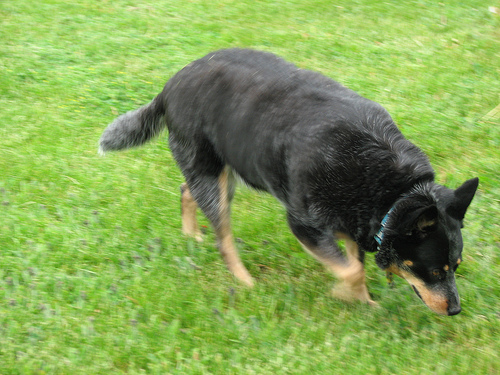

In [46]:
idx = random.randrange(0, len(val_imgs))
img_path = val_imgs[idx]

pred_caption = generate_caption(img_path)
print('Predicted Caption:', pred_caption)
print()
Image.open(img_path)

Predicted Caption: a black and white dog is running through the snow



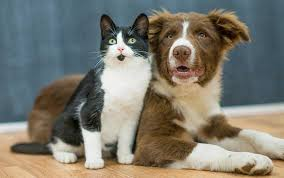

In [47]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2j6yclbKYDav4BGUKLAdTvSFXp1gtuzy5DQ&usqp=CAU"
im = Image.open(requests.get(url, stream=True).raw)
im.save('tmp.jpg')

pred_caption = generate_caption('tmp.jpg')
print('Predicted Caption:', pred_caption)
print()
im